In [1]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10_000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np

def vectorize_seq(sequences, dimensions=10_000):
    results = np.zeros(shape=(len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [3]:
x_train = vectorize_seq(x_train)
x_test = vectorize_seq(x_test)

In [4]:
print(f"Shape: {x_train.shape}")
print(f"Datapoint: {x_train[0]}")

Shape: (25000, 10000)
Datapoint: [0. 1. 1. ... 0. 0. 0.]


In [5]:
# model without dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
    ])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
res = model.fit(x_train,
                y_train,
                epochs=20,
                batch_size=512,
                validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 3s 40ms/step - loss: 0.4588 - accuracy: 0.8142 - val_loss: 0.3322 - val_accuracy: 0.8856
Epoch 2/20
40/40 [==============================] - 1s 32ms/step - loss: 0.2651 - accuracy: 0.9073 - val_loss: 0.2788 - val_accuracy: 0.8934
Epoch 3/20
40/40 [==============================] - 1s 32ms/step - loss: 0.1998 - accuracy: 0.9298 - val_loss: 0.3171 - val_accuracy: 0.8774
Epoch 4/20
40/40 [==============================] - 1s 32ms/step - loss: 0.1644 - accuracy: 0.9431 - val_loss: 0.2791 - val_accuracy: 0.8902
Epoch 5/20
40/40 [==============================] - 1s 32ms/step - loss: 0.1333 - accuracy: 0.9548 - val_loss: 0.2986 - val_accuracy: 0.8882
Epoch 6/20
40/40 [==============================] - 1s 32ms/step - loss: 0.1142 - accuracy: 0.9618 - val_loss: 0.3145 - val_accuracy: 0.8862
Epoch 7/20
40/40 [==============================] - 1s 31ms/step - loss: 0.0988 - accuracy: 0.9688 - val_loss: 0.3348 - val_accuracy: 0.8860
Epoch 8/20
40

In [7]:
eval = model.evaluate(x_test,
                      y_test,
                      batch_size=512)

49/49 [==============================] - 1s 12ms/step - loss: 0.9548 - accuracy: 0.8369


In [9]:
eval

[0.9548240900039673, 0.8369200229644775]

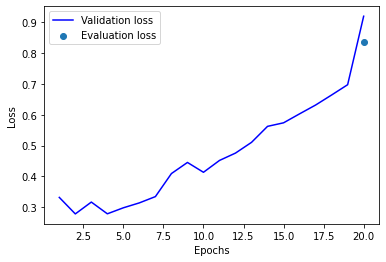

In [11]:
val_loss = res.history["val_loss"]

x_range= range(1, len(val_loss) +1)

import matplotlib.pyplot as plt
plt.plot(x_range, val_loss, "b", label="Validation loss")
plt.scatter(20, eval[1], label="Evaluation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
# train model with dropout
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
res_dr = model.fit(x_train,
                   y_train,
                   epochs=20,
                   batch_size=512,
                   validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 4s 56ms/step - loss: 0.6027 - accuracy: 0.6718 - val_loss: 0.4465 - val_accuracy: 0.8624
Epoch 2/20
40/40 [==============================] - 2s 46ms/step - loss: 0.4576 - accuracy: 0.8088 - val_loss: 0.3491 - val_accuracy: 0.8844
Epoch 3/20
40/40 [==============================] - 2s 48ms/step - loss: 0.3706 - accuracy: 0.8597 - val_loss: 0.3041 - val_accuracy: 0.8836
Epoch 4/20
40/40 [==============================] - 1s 33ms/step - loss: 0.3166 - accuracy: 0.8879 - val_loss: 0.2788 - val_accuracy: 0.8934
Epoch 5/20
40/40 [==============================] - 1s 33ms/step - loss: 0.2772 - accuracy: 0.9026 - val_loss: 0.2722 - val_accuracy: 0.8950
Epoch 6/20
40/40 [==============================] - 1s 33ms/step - loss: 0.2348 - accuracy: 0.9175 - val_loss: 0.2765 - val_accuracy: 0.8934
Epoch 7/20
40/40 [==============================] - 1s 36ms/step - loss: 0.2118 - accuracy: 0.9285 - val_loss: 0.2968 - val_accuracy: 0.8916
Epoch 8/20
40

In [14]:
eval_dr = model.evaluate(x_test, y_test, batch_size=512)

49/49 [==============================] - 1s 12ms/step - loss: 0.6401 - accuracy: 0.8735


<function matplotlib.pyplot.show>

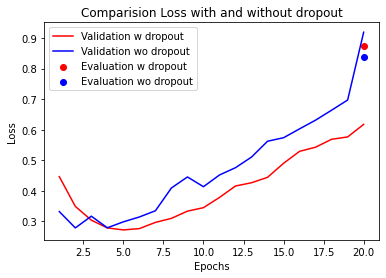

In [15]:
val_loss_dr = res_dr.history["val_loss"]

plt.plot(x_range, val_loss_dr, "r", label="Validation w dropout")
plt.scatter(20, eval_dr[1], c="r", label="Evaluation w dropout")
plt.plot(x_range, val_loss, "b", label="Validation wo dropout")
plt.scatter(20, eval[1], c="b", label="Evaluation wo dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparision Loss with and without dropout")
plt.legend()
plt.show()